# Challenge: What to Use
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. 

Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

In this dataset, the same participants answered questions in 2012 and again in 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
ess = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

print(ess.shape)
ess.head()

(8594, 13)


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


## Did people become less trusting from 2012 (6) to 2014 (7)? Compute results for each country in the sample.

NormaltestResult(statistic=34.41403485540727, pvalue=3.365792056559453e-08)
NormaltestResult(statistic=25.049370820773337, pvalue=3.6357853778444874e-06)
NormaltestResult(statistic=0.5537028123495471, pvalue=0.7581671476973477)
NormaltestResult(statistic=48.02764152552339, pvalue=3.7233182008430934e-11)
NormaltestResult(statistic=85.4862970000314, pvalue=2.7345537691839186e-19)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=72.6342910118729, pvalue=1.6891340175735596e-16)


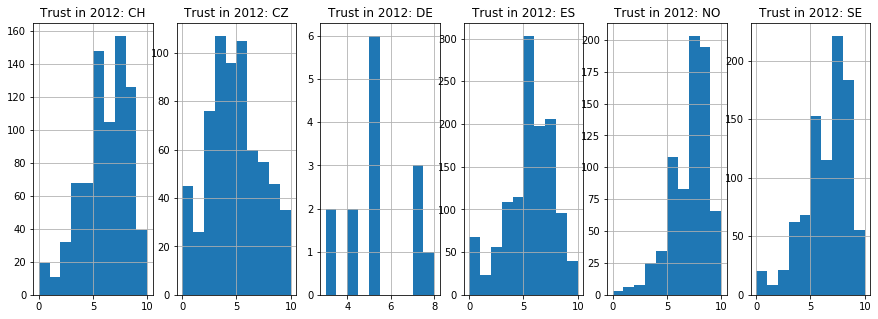

In [3]:
countries = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

plt.figure(figsize=(15, 5))

for i in range(0, len(countries)):
    plt.subplot(1, 6, i + 1)
    ess[(ess['cntry'] == countries[i]) & (ess['year'] == 6)]['ppltrst'].hist()
    plt.title('Trust in 2012: ' + countries[i])
    print(stats.normaltest(ess[(ess['cntry'] == countries[i]) & (ess['year'] == 6)]['ppltrst'], nan_policy='omit'))
  
plt.show()

NormaltestResult(statistic=32.07122389622901, pvalue=1.0859809748932778e-07)
NormaltestResult(statistic=8.015640651166011, pvalue=0.0181729632415102)
NormaltestResult(statistic=0.6451892229565249, pvalue=0.7242674045554323)
NormaltestResult(statistic=29.796593978669407, pvalue=3.3865058313913864e-07)
NormaltestResult(statistic=71.2109329693447, pvalue=3.441457258129768e-16)
NormaltestResult(statistic=66.17133174781476, pvalue=4.276395667350845e-15)


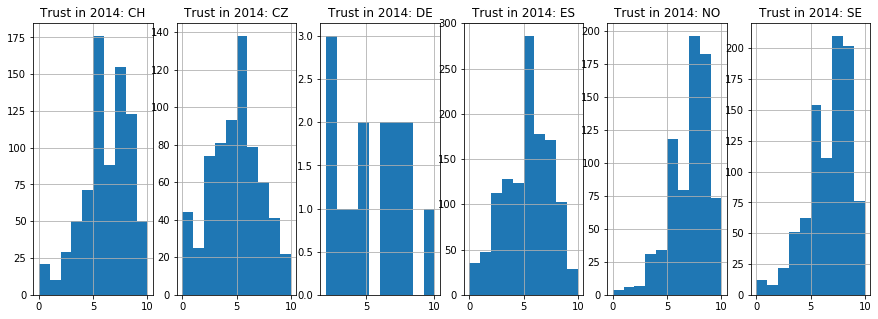

In [4]:
countries = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

plt.figure(figsize=(15, 5))

for i in range(0, len(countries)):
    plt.subplot(1, 6, i + 1)
    ess[(ess['cntry'] == countries[i]) & (ess['year'] == 7)]['ppltrst'].hist()
    plt.title('Trust in 2014: ' + countries[i])
    print(stats.normaltest(ess[(ess['cntry'] == countries[i]) & (ess['year'] == 7)]['ppltrst'], nan_policy='omit'))

plt.show()

Most of the distributions are not normal (non-normal, paired).

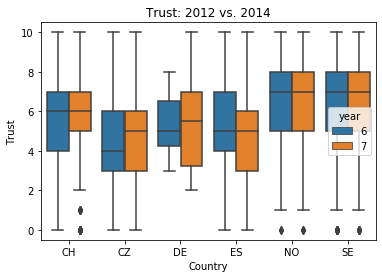

In [5]:
sns.boxplot(x='cntry', y='ppltrst', hue='year', data=ess)
plt.title('Trust: 2012 vs. 2014')
plt.xlabel('Country')
plt.ylabel('Trust')
plt.show()

In [6]:
for i in range(0, len(countries)):
    before = ess[(ess['cntry'] == countries[i]) & (ess['year'] == 6)]['ppltrst']
    after = ess[(ess['cntry'] == countries[i]) & (ess['year'] == 7)]['ppltrst']
    print(countries[i] + ':', stats.wilcoxon(before, after))

CH: WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)
CZ: WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)
DE: WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)
ES: WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)
NO: WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)
SE: WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2866: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2867: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


### Answer:
* Positive statistic means trust went down and negative statistic means trust went up.
* Trust did not significantly change for CH, CZ, DE, and NO.
* Trust significantly decreased for ES and significantly increased for SE.

## Did people become happier from 2012 to 2014? Compute results for each country in the sample.

NormaltestResult(statistic=188.44583258657116, pvalue=1.2009014936632828e-41)
NormaltestResult(statistic=33.31170486577394, pvalue=5.840569510842764e-08)
NormaltestResult(statistic=1.506462655423323, pvalue=0.4708426450576315)
NormaltestResult(statistic=211.81535847203477, pvalue=1.0112983918145527e-46)
NormaltestResult(statistic=228.52086537729167, pvalue=2.38410063518236e-50)
NormaltestResult(statistic=142.6192698491184, pvalue=1.0730477437761676e-31)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


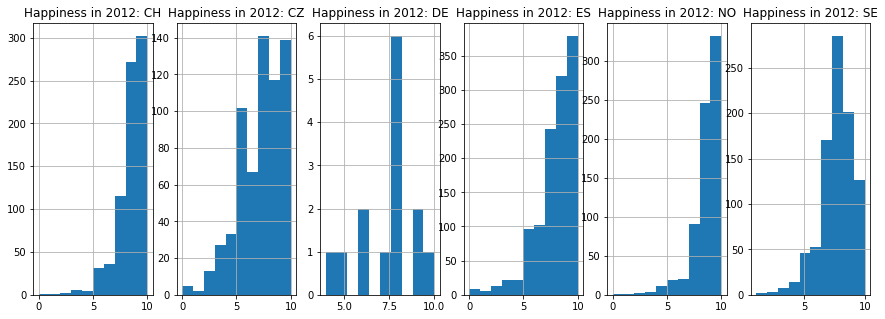

In [7]:
countries = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

plt.figure(figsize=(15, 5))

for i in range(0, len(countries)):
    plt.subplot(1, 6, i + 1)
    ess[(ess['cntry'] == countries[i]) & (ess['year'] == 6)]['happy'].hist()
    plt.title('Happiness in 2012: ' + countries[i])
    print(stats.normaltest(ess[(ess['cntry'] == countries[i]) & (ess['year'] == 6)]['happy'], nan_policy='omit'))

plt.show()

NormaltestResult(statistic=156.83716655039797, pvalue=8.774896545471838e-35)
NormaltestResult(statistic=41.51459060672008, pvalue=9.665430236613688e-10)
NormaltestResult(statistic=2.1782905366822414, pvalue=0.33650399143734494)
NormaltestResult(statistic=196.39100576911136, pvalue=2.260658435940068e-43)
NormaltestResult(statistic=182.17416218051966, pvalue=2.7630154274213406e-40)
NormaltestResult(statistic=88.99061407595354, pvalue=4.7416957358270756e-20)


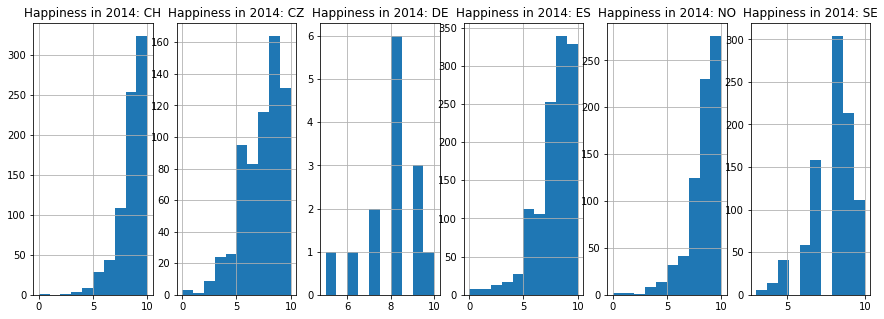

In [8]:
countries = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

plt.figure(figsize=(15, 5))

for i in range(0, len(countries)):
    plt.subplot(1, 6, i + 1)
    ess[(ess['cntry'] == countries[i]) & (ess['year'] == 7)]['happy'].hist()
    plt.title('Happiness in 2014: ' + countries[i])
    print(stats.normaltest(ess[(ess['cntry'] == countries[i]) & (ess['year'] == 7)]['happy'], nan_policy='omit'))

plt.show()

Distributions are skewed to the right (non-normal, paired).

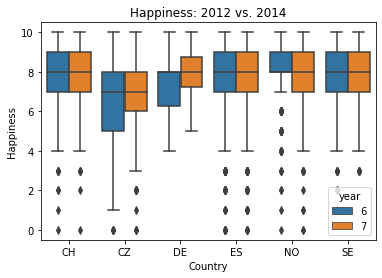

In [9]:
sns.boxplot(x='cntry', y='happy', hue='year', data=ess)
plt.title('Happiness: 2012 vs. 2014')
plt.xlabel('Country')
plt.ylabel('Happiness')
plt.show()

In [10]:
for i in range(0, len(countries)):
    before = ess[(ess['cntry'] == countries[i]) & (ess['year'] == 6)]['happy']
    after = ess[(ess['cntry'] == countries[i]) & (ess['year'] == 7)]['happy']
    print(countries[i] + ':', stats.wilcoxon(before, after))

CH: WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)
CZ: WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)
DE: WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
ES: WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)
NO: WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)
SE: WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2866: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2867: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [11]:
before = ess[(ess['cntry'] == countries[1]) & (ess['year'] == 6)]['happy'].mean()
after = ess[(ess['cntry'] == countries[1]) & (ess['year'] == 7)]['happy'].mean()

print(before, after)

6.7708978328173375 6.914110429447852


### Answer:
* Positive statistic means trust went down and negative statistic means trust went up.
* Happiness did not significantly change for CH, DE, NO, and SE.
* Happiness significantly decreased for CZ and ES.

## Who reported watching more TV in 2012, men or women?

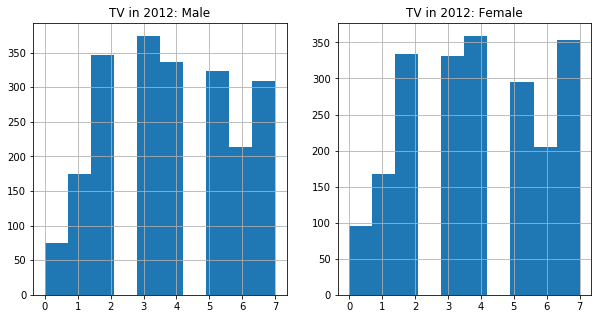

In [12]:
male = ess[(ess['gndr'] == 1) & (ess['year'] == 6)]['tvtot']
female = ess[(ess['gndr'] == 2) & (ess['year'] == 6)]['tvtot']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
male.hist()
plt.title('TV in 2012: Male')

plt.subplot(1, 2, 2)
female.hist()
plt.title('TV in 2012: Female')
  
plt.show()

In [13]:
print(stats.normaltest(male, nan_policy='omit'))
print(stats.normaltest(female, nan_policy='omit'))

NormaltestResult(statistic=407.6545412430977, pvalue=3.0125974743415432e-89)
NormaltestResult(statistic=473.95970583307366, pvalue=1.2049181771413786e-103)


Neither distribution is normal (non-normal, independent)

In [16]:
stats.mannwhitneyu(male, female)

MannwhitneyuResult(statistic=2277506.5, pvalue=0.22419270231191457)

### Answer:
* Men and women watched about the same amount of TV.

## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

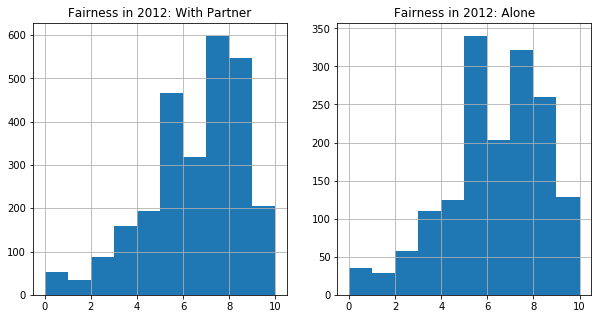

In [17]:
with_partner = ess[(ess['partner'] == 1) & (ess['year'] == 6)]['pplfair']
alone = ess[(ess['partner'] == 2) & (ess['year'] == 6)]['pplfair']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
with_partner.hist()
plt.title('Fairness in 2012: With Partner')

plt.subplot(1, 2, 2)
alone.hist()
plt.title('Fairness in 2012: Alone')
  
plt.show()

In [19]:
print(stats.normaltest(with_partner, nan_policy='omit'))
print(stats.normaltest(alone, nan_policy='omit'))

NormaltestResult(statistic=179.1040099384887, pvalue=1.2825030260118435e-39)
NormaltestResult(statistic=64.92830332216809, pvalue=7.961558194894824e-15)


Neither distribution is normal (non-normal, independent)

In [20]:
stats.mannwhitneyu(with_partner, alone)

MannwhitneyuResult(statistic=2019588.5, pvalue=0.00013938009002030226)

In [23]:
print(with_partner.mean(), alone.mean())
print(with_partner.median(), alone.median())

6.080736012016523 5.856965174129353
7.0 6.0


### Answer:
* People living with a partner were significantly more likely to believe people were fair.

## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

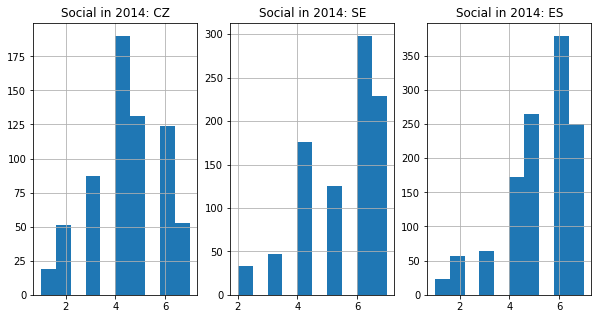

In [27]:
cz = ess[(ess['cntry'] == 'CZ') & (ess['year'] == 7)]['sclmeet']
se = ess[(ess['cntry'] == 'SE') & (ess['year'] == 7)]['sclmeet']
es = ess[(ess['cntry'] == 'ES') & (ess['year'] == 7)]['sclmeet']

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
cz.hist()
plt.title('Social in 2014: CZ')

plt.subplot(1, 3, 2)
se.hist()
plt.title('Social in 2014: SE')

plt.subplot(1, 3, 3)
es.hist()
plt.title('Social in 2014: ES')
  
plt.show()

In [28]:
print(stats.normaltest(cz, nan_policy='omit'))
print(stats.normaltest(se, nan_policy='omit'))
print(stats.normaltest(es, nan_policy='omit'))

NormaltestResult(statistic=15.862430828428618, pvalue=0.00035934938904641126)
NormaltestResult(statistic=67.04167854218153, pvalue=2.767479903094787e-15)
NormaltestResult(statistic=123.94225873711831, pvalue=1.2197771062763894e-27)


None of the distributions is normal (non-normal, compare three or more groups).

In [30]:
stats.median_test(cz, se, es, nan_policy='omit')

(159.6592696121072, 2.1400805076813823e-35, 5.0, array([[177, 527, 629],
        [478, 381, 582]]))

In [31]:
print(cz.mean(), se.mean(), es.mean())
print(cz.median(), se.median(), es.median())

4.445801526717557 5.426211453744493 5.2601156069364166
4.0 6.0 6.0


### Answer:
* The medians of the three countries are significantly different.
* CZ meets socially less often than SE and ES.

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

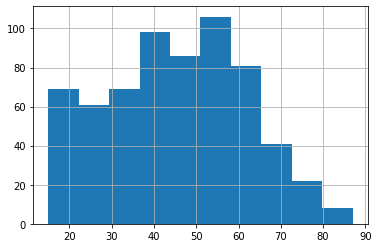

In [32]:
ess[(ess['cntry'] == 'CZ') & (ess['year'] == 7)]['agea'].hist()

In [33]:
cz_young = ess[(ess['cntry'] == 'CZ') & (ess['year'] == 7) & (ess['agea'] < 45)]['sclmeet']
cz_med = ess[(ess['cntry'] == 'CZ') & (ess['year'] == 7) & (ess['agea'] >= 45) & (ess['agea'] < 65)]['sclmeet']
cz_old = ess[(ess['cntry'] == 'CZ') & (ess['year'] == 7) & (ess['agea'] >= 65)]['sclmeet']

se_young = ess[(ess['cntry'] == 'SE') & (ess['year'] == 7) & (ess['agea'] < 45)]['sclmeet']
se_med = ess[(ess['cntry'] == 'SE') & (ess['year'] == 7) & (ess['agea'] >= 45) & (ess['agea'] < 65)]['sclmeet']
se_old = ess[(ess['cntry'] == 'SE') & (ess['year'] == 7) & (ess['agea'] >= 65)]['sclmeet']

es_young = ess[(ess['cntry'] == 'ES') & (ess['year'] == 7) & (ess['agea'] < 45)]['sclmeet']
es_med = ess[(ess['cntry'] == 'ES') & (ess['year'] == 7) & (ess['agea'] >= 45) & (ess['agea'] < 65)]['sclmeet']
es_old = ess[(ess['cntry'] == 'ES') & (ess['year'] == 7) & (ess['agea'] >= 65)]['sclmeet']

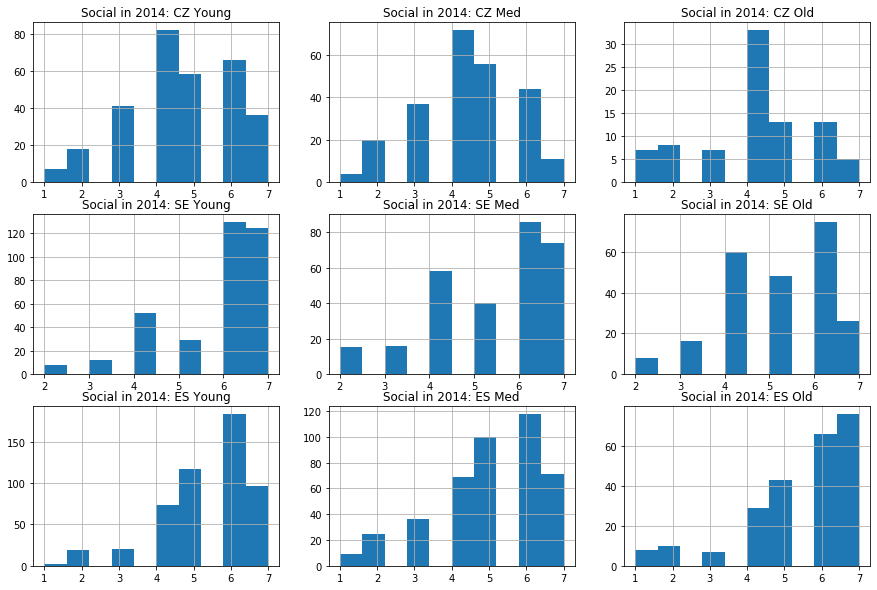

In [36]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
cz_young.hist()
plt.title('Social in 2014: CZ Young')

plt.subplot(3, 3, 2)
cz_med.hist()
plt.title('Social in 2014: CZ Med')

plt.subplot(3, 3, 3)
cz_old.hist()
plt.title('Social in 2014: CZ Old')

plt.subplot(3, 3, 4)
se_young.hist()
plt.title('Social in 2014: SE Young')

plt.subplot(3, 3, 5)
se_med.hist()
plt.title('Social in 2014: SE Med')

plt.subplot(3, 3, 6)
se_old.hist()
plt.title('Social in 2014: SE Old')

plt.subplot(3, 3, 7)
es_young.hist()
plt.title('Social in 2014: ES Young')

plt.subplot(3, 3, 8)
es_med.hist()
plt.title('Social in 2014: ES Med')

plt.subplot(3, 3, 9)
es_old.hist()
plt.title('Social in 2014: ES Old')
  
plt.show()

In [37]:
print(stats.normaltest(cz_young, nan_policy='omit'))
print(stats.normaltest(cz_med, nan_policy='omit'))
print(stats.normaltest(cz_old, nan_policy='omit'))

print(stats.normaltest(se_young, nan_policy='omit'))
print(stats.normaltest(se_med, nan_policy='omit'))
print(stats.normaltest(se_old, nan_policy='omit'))

print(stats.normaltest(es_young, nan_policy='omit'))
print(stats.normaltest(es_med, nan_policy='omit'))
print(stats.normaltest(es_old, nan_policy='omit'))

NormaltestResult(statistic=10.76841309269215, pvalue=0.004588479624164618)
NormaltestResult(statistic=4.333356470299184, pvalue=0.11455751872832269)
NormaltestResult(statistic=1.3739927065536321, pvalue=0.5030848912323418)
NormaltestResult(statistic=49.642566630268696, pvalue=1.6605563682324252e-11)
NormaltestResult(statistic=22.72909386225615, pvalue=1.1599518943172092e-05)
NormaltestResult(statistic=9.68095406659085, pvalue=0.007903283023066698)
NormaltestResult(statistic=52.68257260954697, pvalue=3.631823309008968e-12)
NormaltestResult(statistic=27.471338841501357, pvalue=1.083114987341854e-06)
NormaltestResult(statistic=41.258927411074865, pvalue=1.0983423969520743e-09)


Most of the distributions are not normal (non-normal, compare three or more groups).

In [38]:
stats.median_test(cz_young, se_young, es_young, nan_policy='omit')

(57.758100396083684, 2.8707003112113504e-13, 6.0, array([[ 36, 125,  97],
        [272, 231, 416]]))

In [41]:
print(cz_young.mean(), se_young.mean(), es_young.mean())
print(cz_young.median(), se_young.median(), es_young.median())

4.64935064935065 5.786516853932584 5.3879142300194935
5.0 6.0 6.0


In [39]:
stats.median_test(cz_med, se_med, es_med, nan_policy='omit')

(59.91627502405346, 9.757671438998133e-14, 5.0, array([[ 55, 160, 189],
        [189, 129, 239]]))

In [42]:
print(cz_med.mean(), se_med.mean(), es_med.mean())
print(cz_med.median(), se_med.median(), es_med.median())

4.360655737704918 5.342560553633218 5.018691588785047
4.0 6.0 5.0


In [40]:
stats.median_test(cz_old, se_old, es_old, nan_policy='omit')

(39.508902790412115, 2.634818875658755e-09, 5.0, array([[ 18, 101, 142],
        [ 68, 132,  97]]))

In [43]:
print(cz_old.mean(), se_old.mean(), es_old.mean())
print(cz_old.median(), se_old.median(), es_old.median())

4.116279069767442 5.047210300429184 5.472803347280335
4.0 5.0 6.0


### Answer:
* The medians for all three age groups of the three countries are significantly different.
* CZ meets socially less often than SE and ES across all three age groups.